In [1]:
# importing libraries 
# TODO -> Use module for scripts 
import numpy as np
import pandas as pd 
import dataexp as dtex # our code
import dataio as dtio # our code 
import preprocessing as pre # our code 
from IPython.display import display
from collections import OrderedDict

%matplotlib inline

## Data Pre-Processing & Exploration

In [2]:
# importing data 
path = "data/"
extensions = ".arff"

# get files with .arff extension in path specified
files_path = dtio.file_paths(path, extensions)
# converts .arff files to dataframes 
df_years = dtio.arff2df(files_path, True) 

# create column names 
columns_name = []
for i in range(df_years[0][1].shape[1] - 1):
    columns_name.append("x" + str(i + 1))
columns_name.append("outcome")

# change header/column names 
# convert features to floats (to make sure we have consistency)
# changing the class/outcome column to 0 and 1 (not bankrupt and bankrupt)
# print path and shape for each dataframe imported & convert outcome variable to 0/1
def format_dict_dfs(dict_dfs, col_names ,verbose = False):
    for i in range(len(dict_dfs)):
        dict_dfs[i][1].columns = col_names 
        dict_dfs[i][1][col_names[:-1]] = dict_dfs[i][1][col_names[:-1]].apply(pd.to_numeric)
        dict_dfs[i][1]["outcome"] = dict_dfs[i][1]["outcome"].astype("category").cat.codes

        if(verbose == True):
            print("Path: {0}, Shape: {1}".format(dict_dfs[i][0], dict_dfs[i][1].shape))

# format dataframes
format_dict_dfs(df_years, columns_name, True)
            
# since we made sure which dataframe was loaded from (path) and sorted by year 
# make list of different dataframes 
dataframes = [x[1] for x in df_years]

# print head for first case (year 1)
display(dataframes[0].head())
#display(year_one.dtypes)

Path: data/1year.arff, Shape: (7027, 65)
Path: data/2year.arff, Shape: (10173, 65)
Path: data/3year.arff, Shape: (10503, 65)
Path: data/4year.arff, Shape: (9792, 65)
Path: data/5year.arff, Shape: (5910, 65)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x56,x57,x58,x59,x60,x61,x62,x63,x64,outcome
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


### Missing Values

,year,total_instances,total_instances_with_missing_values,total_instances_without_missing_values,data_loss
0,1_year,7027.0,3833.0,3194.0,0.5455
1,2_year,10173.0,6085.0,4088.0,0.5982
2,3_year,10503.0,5618.0,4885.0,0.5349
3,4_year,9792.0,5023.0,4769.0,0.5130
4,5_year,5910.0,2879.0,3031.0,0.4871


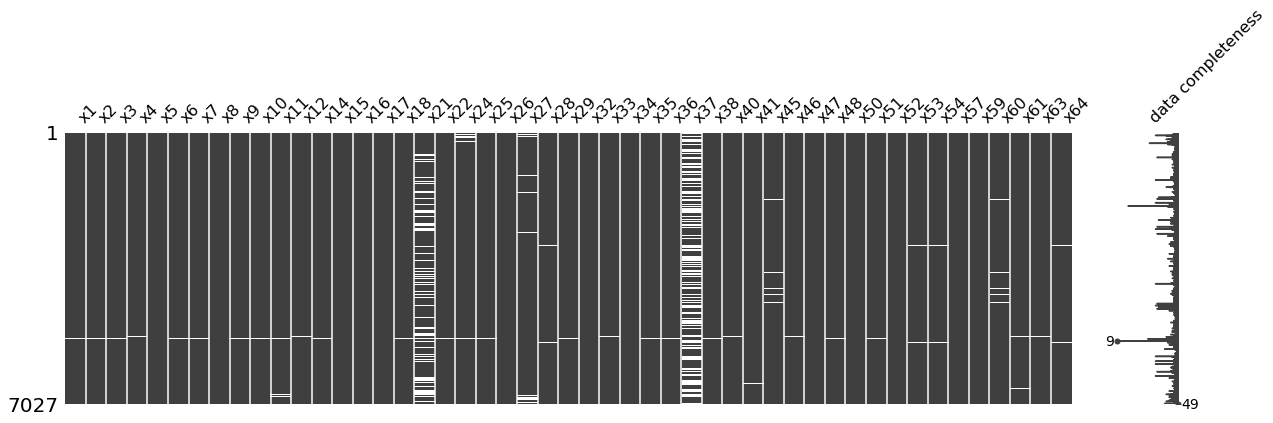

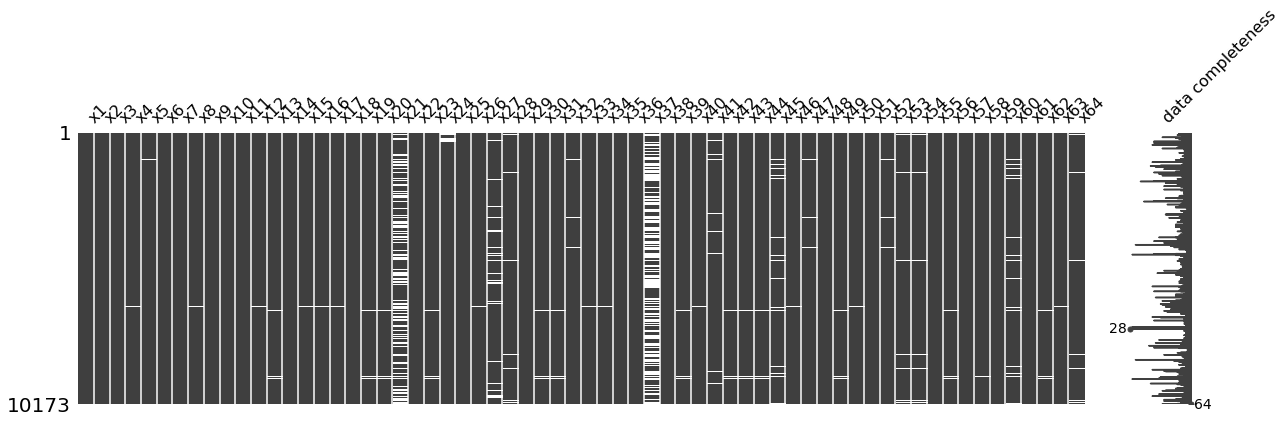

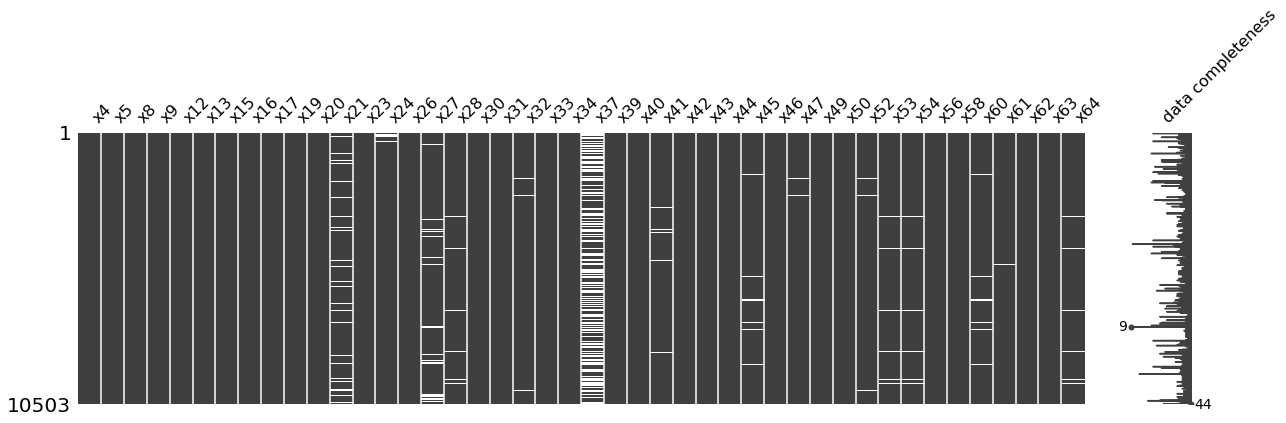

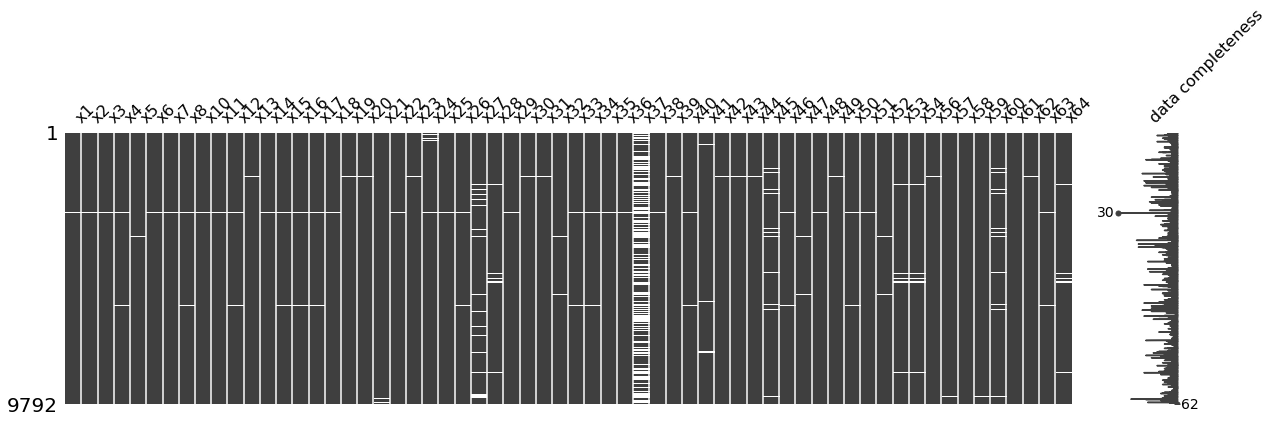

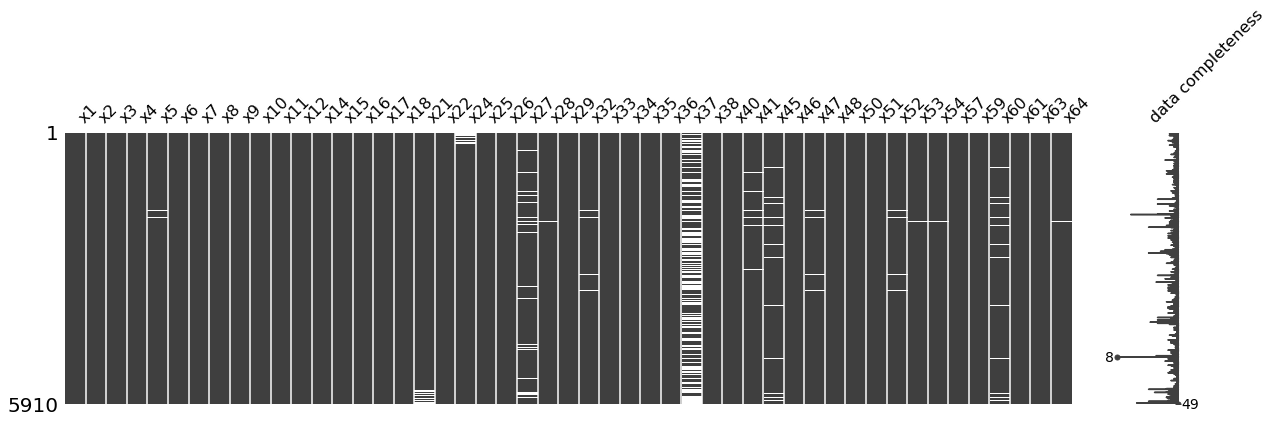

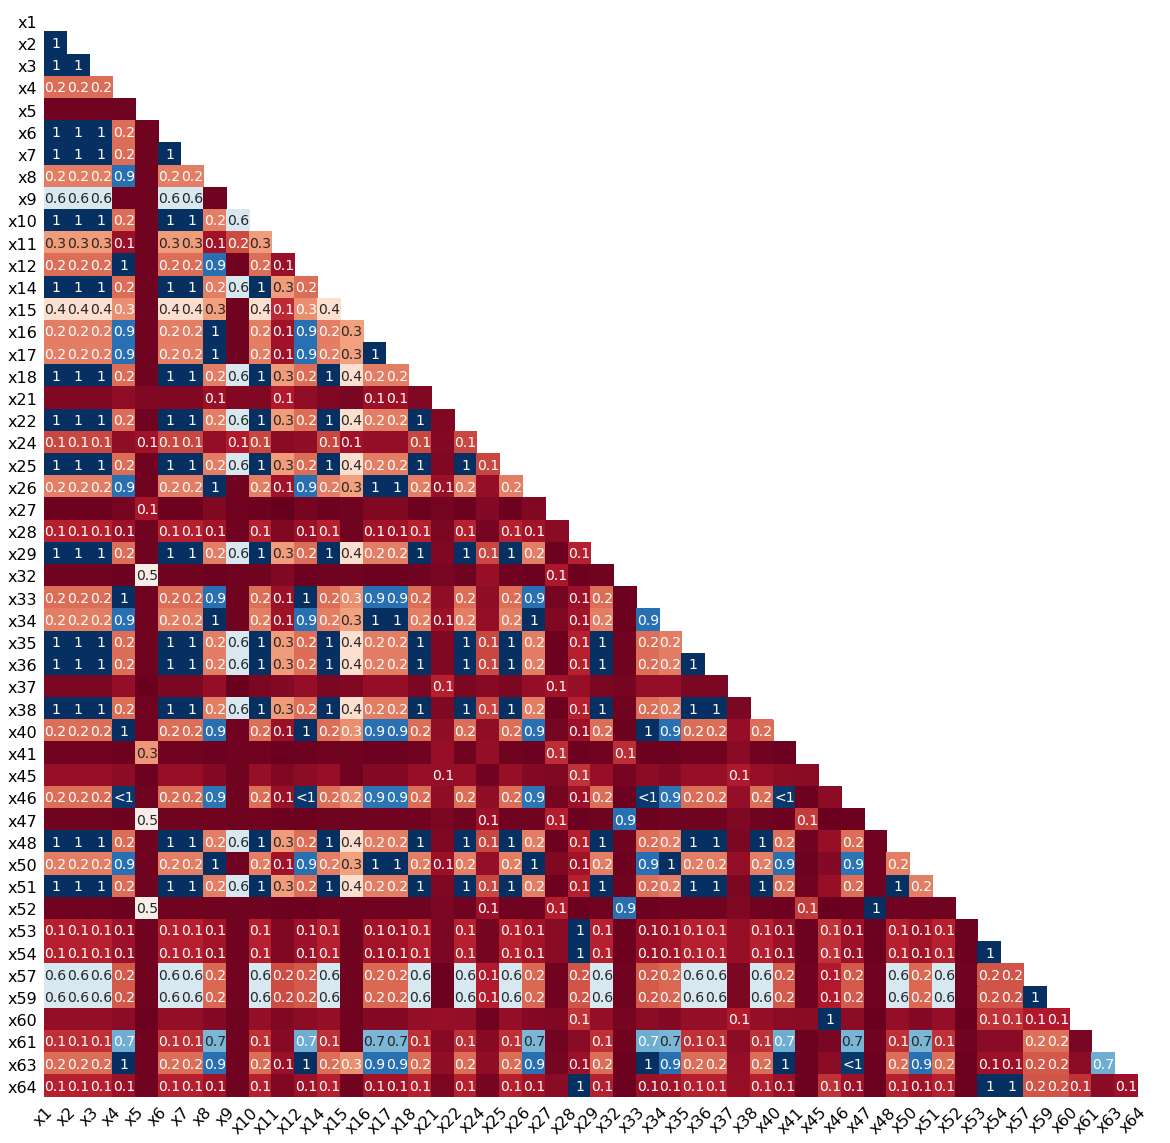

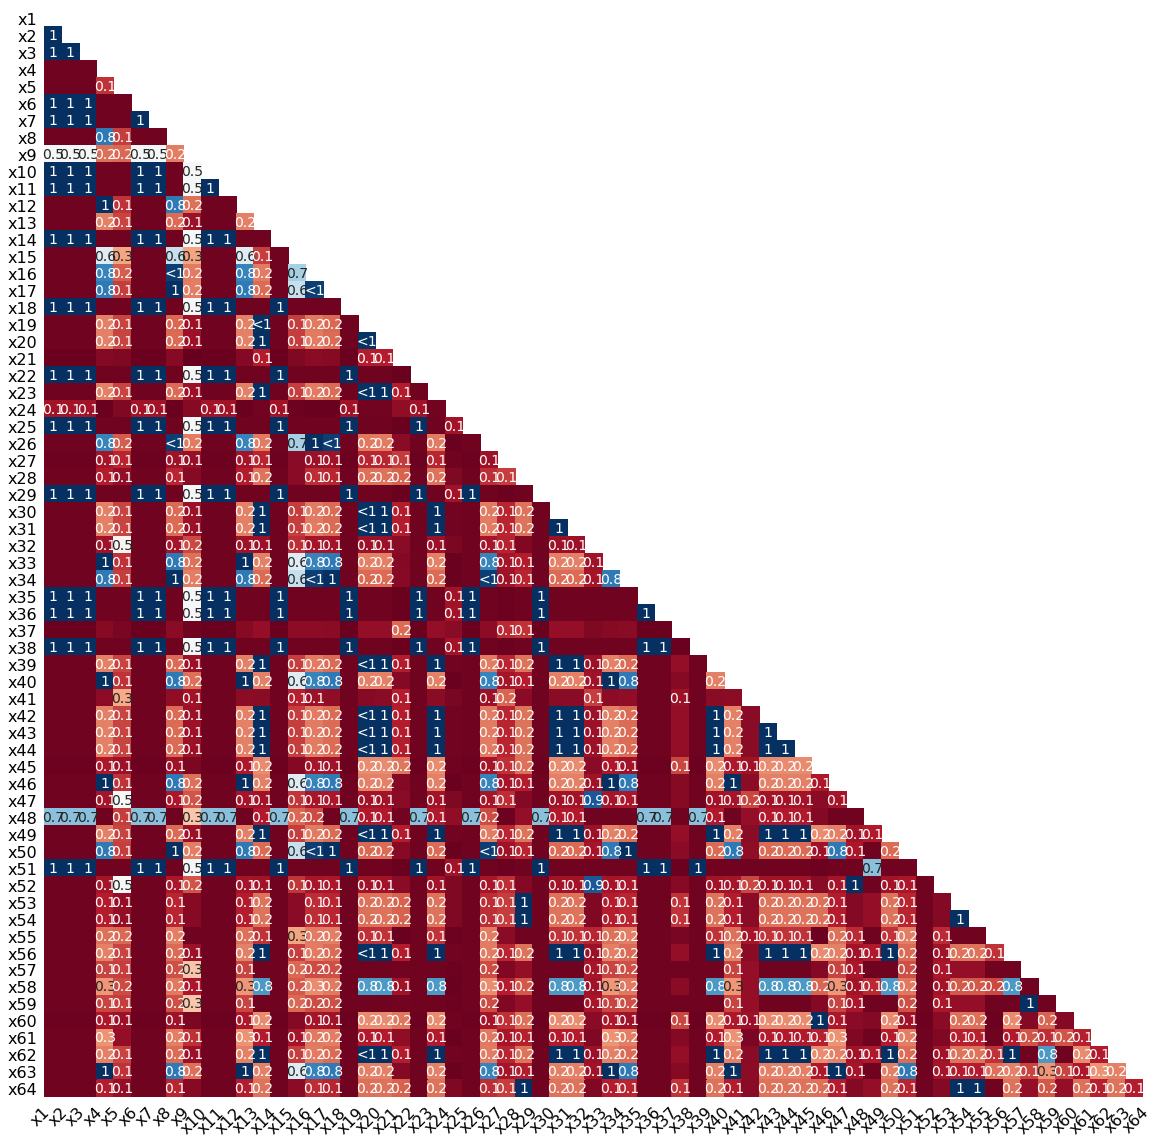

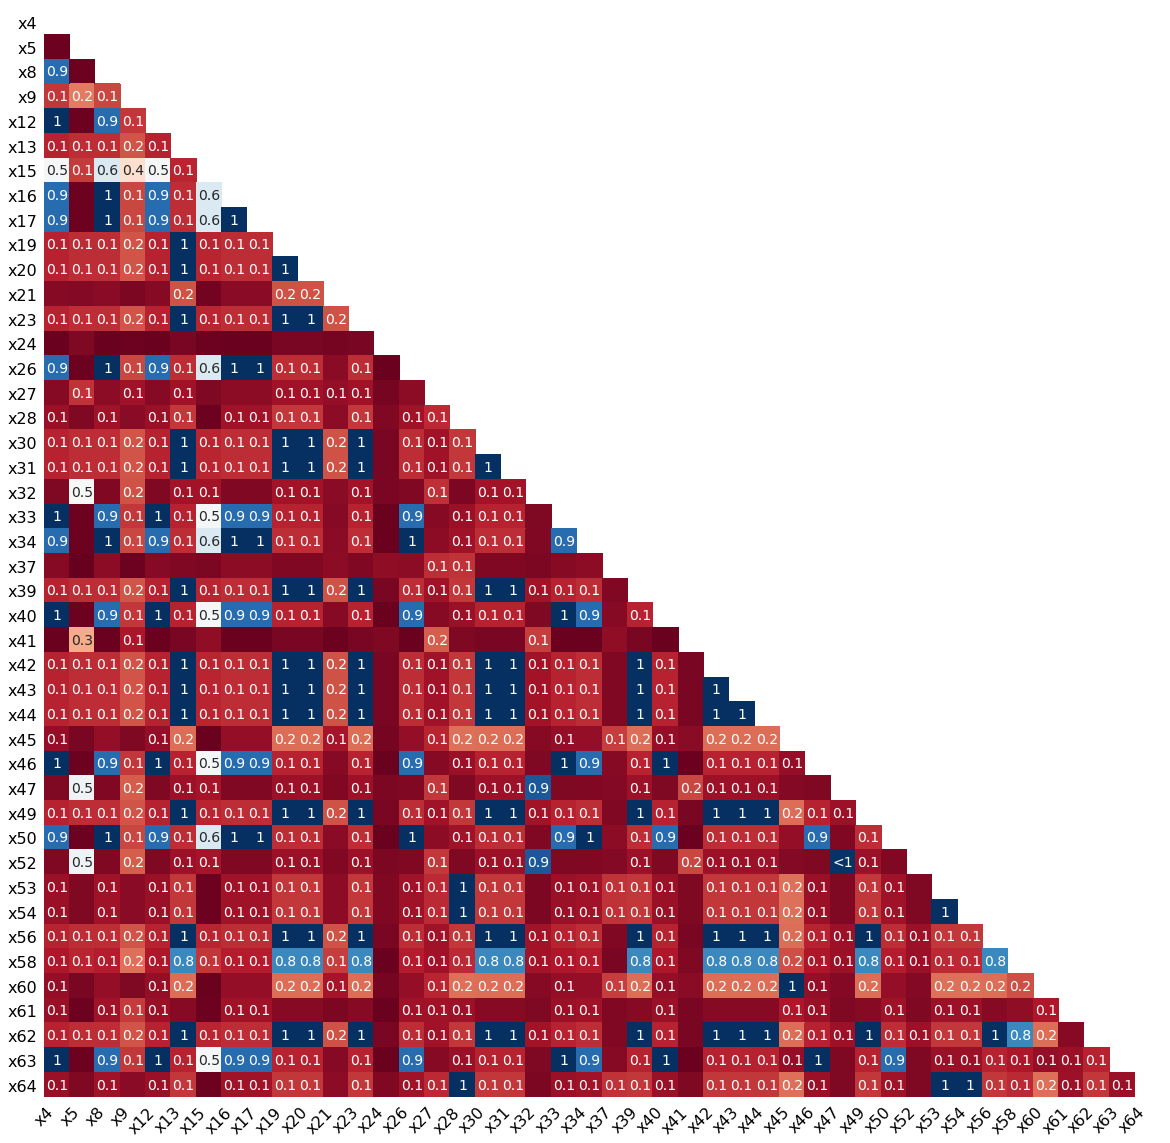

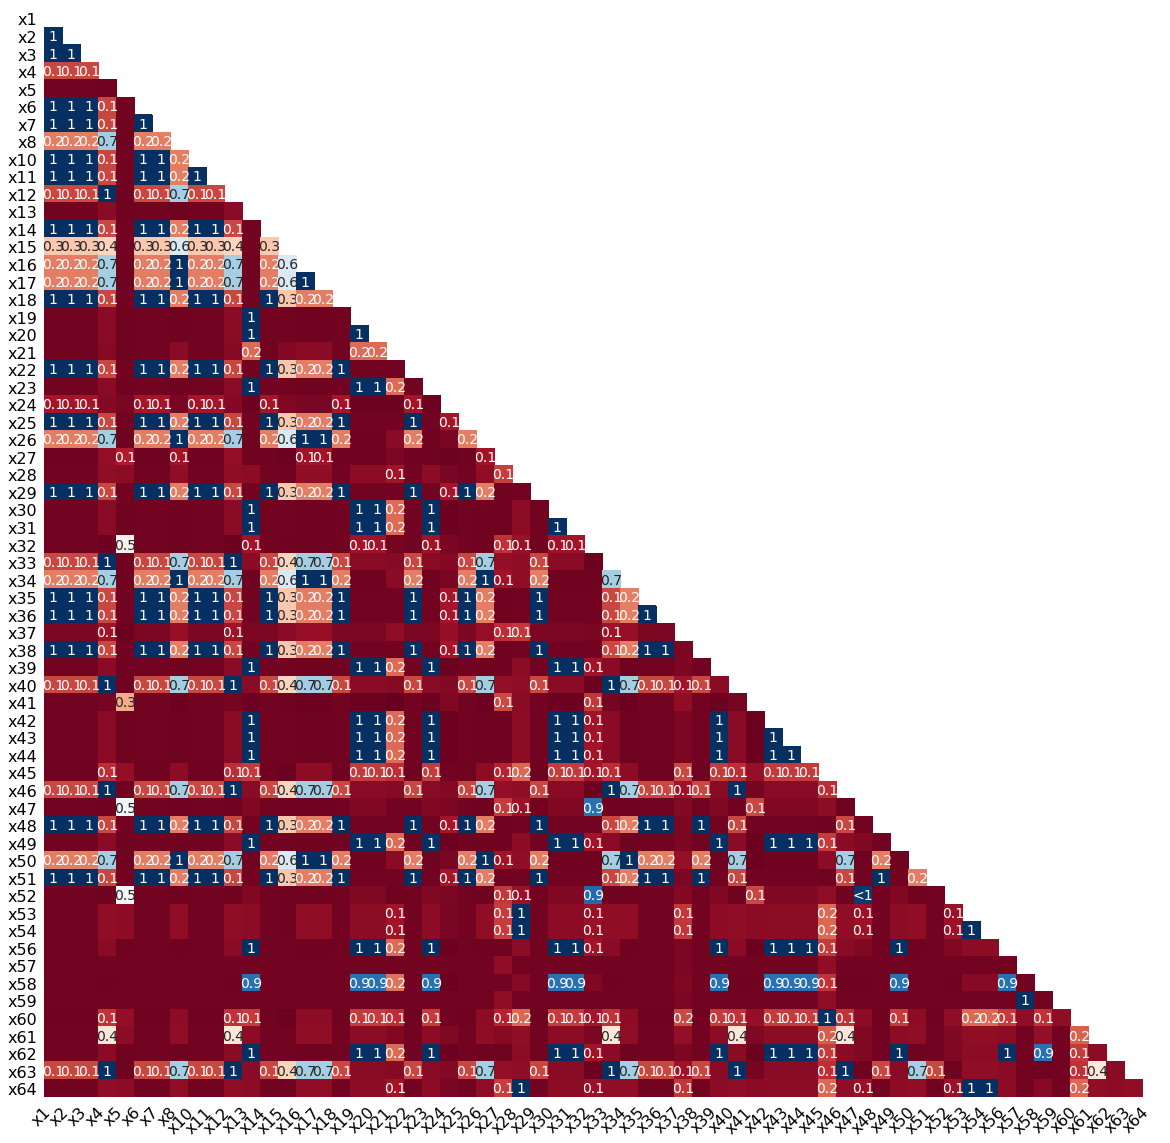

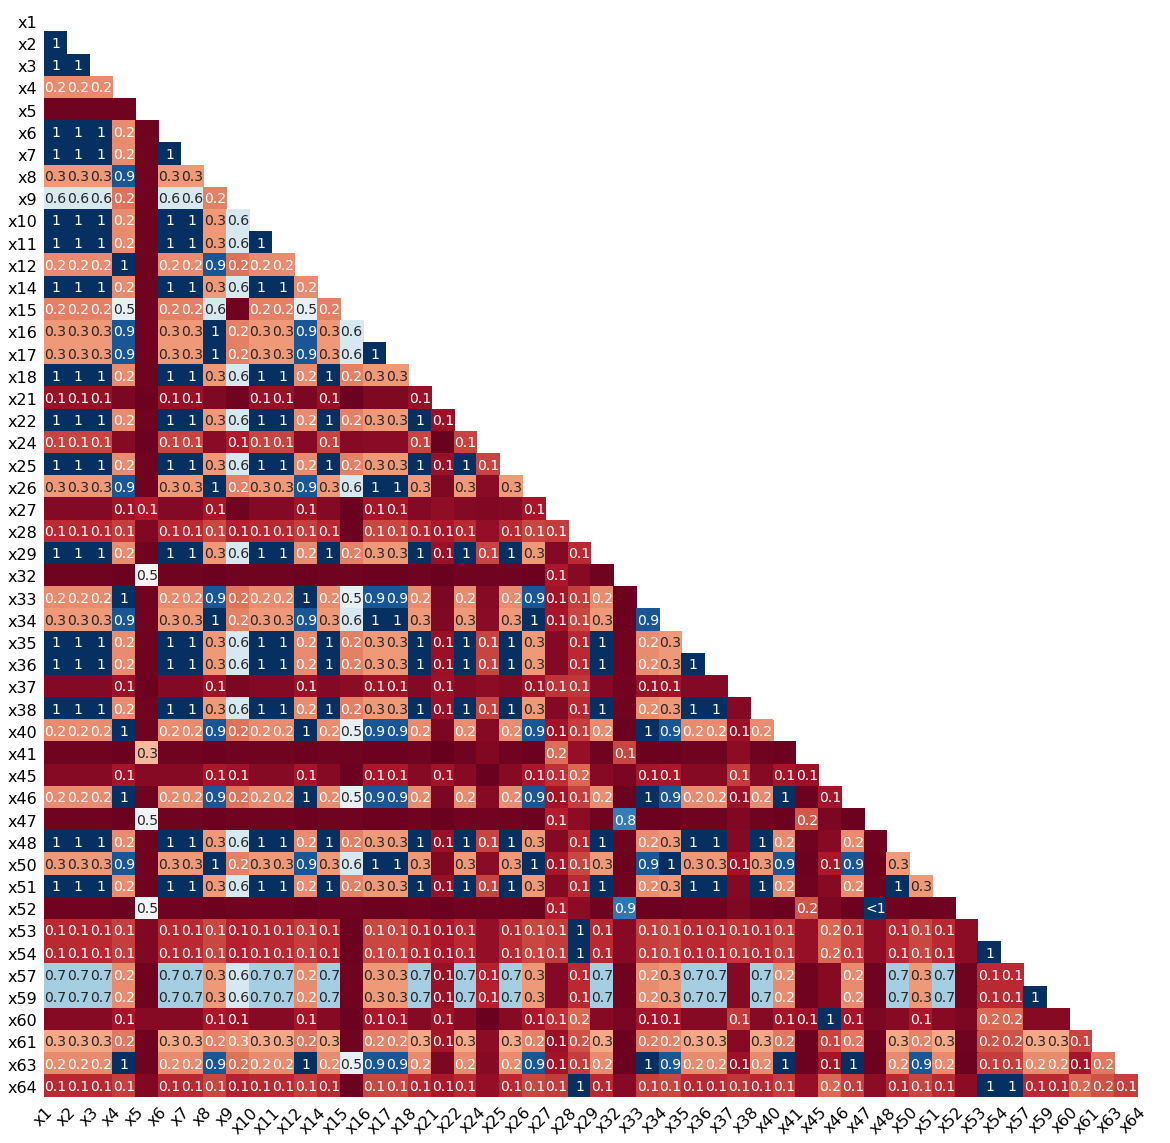

In [3]:
# displaying missing values stats
missing_stats_df = dtex.missing_stats(dataframes)
year_headers = ["1_year" , "2_year", "3_year" , "4_year", "5_year"]
missing_stats_df.insert(loc=0, column= "year", value= year_headers)
display(missing_stats_df)

# nullity matrix 
dtex.nullity_matrix(dataframes, include_all = False)
# heatmap - nullity correlation 
dtex.nullity_heatmap(dataframes, include_all = False)

### Data Imputation 

In [4]:
# save imputation data if files dont exists + retrieve
imp_common_path = path + "imputation"

# mean imputation
imp_mean_path = imp_common_path + "_mean/"
dtio.df2arff_function(imp_mean_path, year_headers, pre.mean_imputation, dataframes)
imp_mean_dfs = dtio.arff2df(dtio.file_paths(imp_mean_path, extensions), True)  
format_dict_dfs(imp_mean_dfs, columns_name, True)

# median imputation
imp_median_path = imp_common_path + "_median/"
dtio.df2arff_function(imp_median_path, year_headers, pre.median_imputation, dataframes)
imp_median_dfs = dtio.arff2df(dtio.file_paths(imp_median_path, extensions), True)  
format_dict_dfs(imp_median_dfs, columns_name, True)

# mode imputation 
imp_mode_path = imp_common_path + "_mode/"
dtio.df2arff_function(imp_mode_path, year_headers, pre.mode_imputation, dataframes)
imp_mode_dfs = dtio.arff2df(dtio.file_paths(imp_mode_path, extensions), True)  
format_dict_dfs(imp_mode_dfs, columns_name, True)

# expectation maximization imputation
imp_em_path = imp_common_path + "_em/"
dtio.df2arff_function(imp_em_path, year_headers, pre.em_imputation, dataframes, "float", 60)
imp_em_dfs = dtio.arff2df(dtio.file_paths(imp_em_path, extensions), True)  
format_dict_dfs(imp_em_dfs, columns_name, True)

# multivariate imputation by chained equations imputation
imp_mice_path = imp_common_path + "_mice/"
dtio.df2arff_function(imp_mice_path, year_headers, pre.mice_imputation, dataframes, "float")
imp_mice_dfs = dtio.arff2df(dtio.file_paths(imp_mice_path, extensions), True)  
format_dict_dfs(imp_mice_dfs, columns_name, True)

# k nearest neighbours imputation
imp_knn_path = imp_common_path + "_knn/"
dtio.df2arff_function(imp_knn_path, year_headers, pre.knn_imputation, dataframes, "float", 100)
imp_knn_dfs = dtio.arff2df(dtio.file_paths(imp_knn_path, extensions), True)
format_dict_dfs(imp_knn_dfs, columns_name, True)

# creating ordered dictionary for all different imputation methods 
imp_dfs_dict = OrderedDict()
imp_dfs_dict["Mean"] = [x[1] for x in imp_mean_dfs]
imp_dfs_dict["Median"] = [x[1] for x in imp_median_dfs]
imp_dfs_dict["Mode"] = [x[1] for x in imp_mode_dfs]
imp_dfs_dict["Em"] = [x[1] for x in imp_em_dfs]
imp_dfs_dict["Mice"] = [x[1] for x in imp_mice_dfs]
imp_dfs_dict["Knn"] = [x[1] for x in imp_knn_dfs]

Path: data/imputation_mean/1_year.arff, Shape: (7027, 65)
Path: data/imputation_mean/2_year.arff, Shape: (10173, 65)
Path: data/imputation_mean/3_year.arff, Shape: (10503, 65)
Path: data/imputation_mean/4_year.arff, Shape: (9792, 65)
Path: data/imputation_mean/5_year.arff, Shape: (5910, 65)
Path: data/imputation_median/1_year.arff, Shape: (7027, 65)
Path: data/imputation_median/2_year.arff, Shape: (10173, 65)
Path: data/imputation_median/3_year.arff, Shape: (10503, 65)
Path: data/imputation_median/4_year.arff, Shape: (9792, 65)
Path: data/imputation_median/5_year.arff, Shape: (5910, 65)
Path: data/imputation_mode/1_year.arff, Shape: (7027, 65)
Path: data/imputation_mode/2_year.arff, Shape: (10173, 65)
Path: data/imputation_mode/3_year.arff, Shape: (10503, 65)
Path: data/imputation_mode/4_year.arff, Shape: (9792, 65)
Path: data/imputation_mode/5_year.arff, Shape: (5910, 65)
Path: data/imputation_em/1_year.arff, Shape: (7027, 65)
Path: data/imputation_em/2_year.arff, Shape: (10173, 65)
P

### Feature Exploration

In [5]:
import random_forest as rf 
from sklearn.model_selection import train_test_split

X = imp_dfs_dict["Mean"][0].drop("outcome", axis=1).values
y = imp_dfs_dict["Mean"][0]["outcome"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.9665718349928877

In [8]:
import _decision_tree_criterion as dc
import random_forest as rf 
import time

start = time.time()
for i in range(10000):
    rf.gini_impurity(y_train)
end = time.time()
print(end - start)

start = time.time()
for i in range(10000):
    dc.gini_impurity(y_train)
end = time.time()
print(end - start)



0.7701399326324463
0.5872659683227539


TODO: 

Check imputation is done correctly because of null values 

Check assumptions for models which will be used

David Silver